# Car Insurance Claim Insurance Project

In [1]:
#Importing Libraries

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,OneHotEncoder

import scipy
import scipy.stats as stats
from sklearn.feature_selection import SelectKBest, mutual_info_classif,chi2

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import cohen_kappa_score, accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix,classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC



In [3]:
plt.rcParams['figure.figsize']=[15,6]

In [4]:
# Read csv file

In [5]:
df=pd.read_csv('car_insurance.csv')

In [6]:
df.shape

(58592, 44)

In [7]:
df.head(10)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.050000,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.600000,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.020000,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.600000,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.020000,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.600000,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.110000,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.800000,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.110000,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.000000,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
5,ID00006,1.018709,0.070000,0.519231,C6,13051,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,Yes,Yes,Yes,Yes,Yes,Disc,1493,4,Automatic,6,Power,5.200000,4300,1790,1635,1720,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
6,ID00007,0.097992,0.160000,0.403846,C7,6112,4,B2,M5,Diesel,200Nm@3000rpm,88.77bhp@4000rpm,1.5 Turbocharged Revotorq,2,No,Yes,No,Yes,No,Drum,1497,4,Manual,5,Electric,5.000000,3990,1755,1523,1490,No,No,No,No,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0
7,ID00008,0.509085,0.140000,0.423077,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.800000,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
8,ID00009,0.282394,0.070000,0.298077,C7,6112,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,Yes,Yes,Yes,Yes,Yes,Disc,1493,4,Automatic,6,Power,5.200000,4300,1790,1635,1720,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
9,ID00010,0.566255,0.040000,0.442308,C9,17804,1,B2,M7,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K Series Engine,6,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.850000,3990,1745,1500,1410,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [9]:
# check missing values

In [10]:
df.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [11]:
# check data imbalance (target variable check)

In [12]:
df['is_claim'].value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

In [13]:
df['is_claim'].value_counts(normalize=True)

0   0.936032
1   0.063968
Name: is_claim, dtype: float64

<AxesSubplot:>

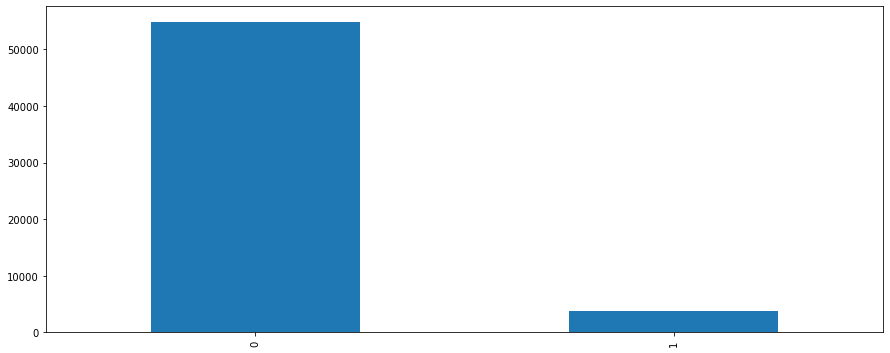

In [14]:
df['is_claim'].value_counts().plot(kind='bar')

In [15]:
# check duplicate rows

In [16]:
df.duplicated().sum()

0

In [17]:
# Check for outliers using IQR method

In [18]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
upper=Q3+1.5*IQR
lower=Q1-1.5*IQR

In [19]:
df_trimmed=df[~((df<lower)|(df>upper)).any(axis=1)]
df_trimmed.shape

(38251, 44)

In [20]:
df.nunique()

policy_id                           58592
policy_tenure                       58592
age_of_car                             49
age_of_policyholder                    75
area_cluster                           22
population_density                     22
make                                    5
segment                                 6
model                                  11
fuel_type                               3
max_torque                              9
max_power                               9
engine_type                            11
airbags                                 3
is_esc                                  2
is_adjustable_steering                  2
is_tpms                                 2
is_parking_sensors                      2
is_parking_camera                       2
rear_brakes_type                        2
displacement                            9
cylinder                                2
transmission_type                       2
gear_box                          

In [21]:
df_trimmed.nunique()

policy_id                           38251
policy_tenure                       38251
age_of_car                             25
age_of_policyholder                    56
area_cluster                           20
population_density                     20
make                                    4
segment                                 5
model                                   9
fuel_type                               3
max_torque                              7
max_power                               7
engine_type                             9
airbags                                 3
is_esc                                  2
is_adjustable_steering                  2
is_tpms                                 1
is_parking_sensors                      2
is_parking_camera                       2
rear_brakes_type                        1
displacement                            7
cylinder                                2
transmission_type                       2
gear_box                          

In [22]:
# making new columns from max_torque and max_power columns

In [23]:
def data_preprocessor(df):

    #Clean max_torque and max_power cols
    df["max_torque_Nm"] = df["max_torque"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*Nm)").astype('float64')
    df["max_torque_rpm"] = df["max_torque"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*rpm)").astype('float64')
    
    df["max_power_bhp"] = df["max_power"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*bhp)").astype('float64')
    df["max_power_rpm"] = df["max_power"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*rpm)").astype('float64')

    #Drop original cols
    df.drop(["max_torque","max_power"],axis=1,inplace=True)

In [24]:
data_preprocessor(df)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  engine_type                       58592 non-null  object 
 11  airbags                           58592 non-null  int64  
 12  is_e

In [26]:
# dropping columns policy_id,make,model

In [27]:
df.drop(['policy_id'],axis=1,inplace=True)

In [28]:
# Conversion of some numerical columns with very less unique values like (2,3,4 values only) to object type 
df['airbags']=df['airbags'].astype('object')
df['cylinder']=df['cylinder'].astype('object')
df['gear_box']=df['gear_box'].astype('object')
df['ncap_rating']=df['ncap_rating'].astype('object')
df['is_claim']=df['is_claim'].astype('object')
df['make']=df['make'].astype('object')

### Univariate Analysis

In [29]:
# For categorical columns

In [30]:
cat=df.select_dtypes(include='object').columns
cat

Index(['area_cluster', 'make', 'segment', 'model', 'fuel_type', 'engine_type',
       'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms',
       'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type',
       'cylinder', 'transmission_type', 'gear_box', 'steering_type',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

In [31]:
len(cat)

31

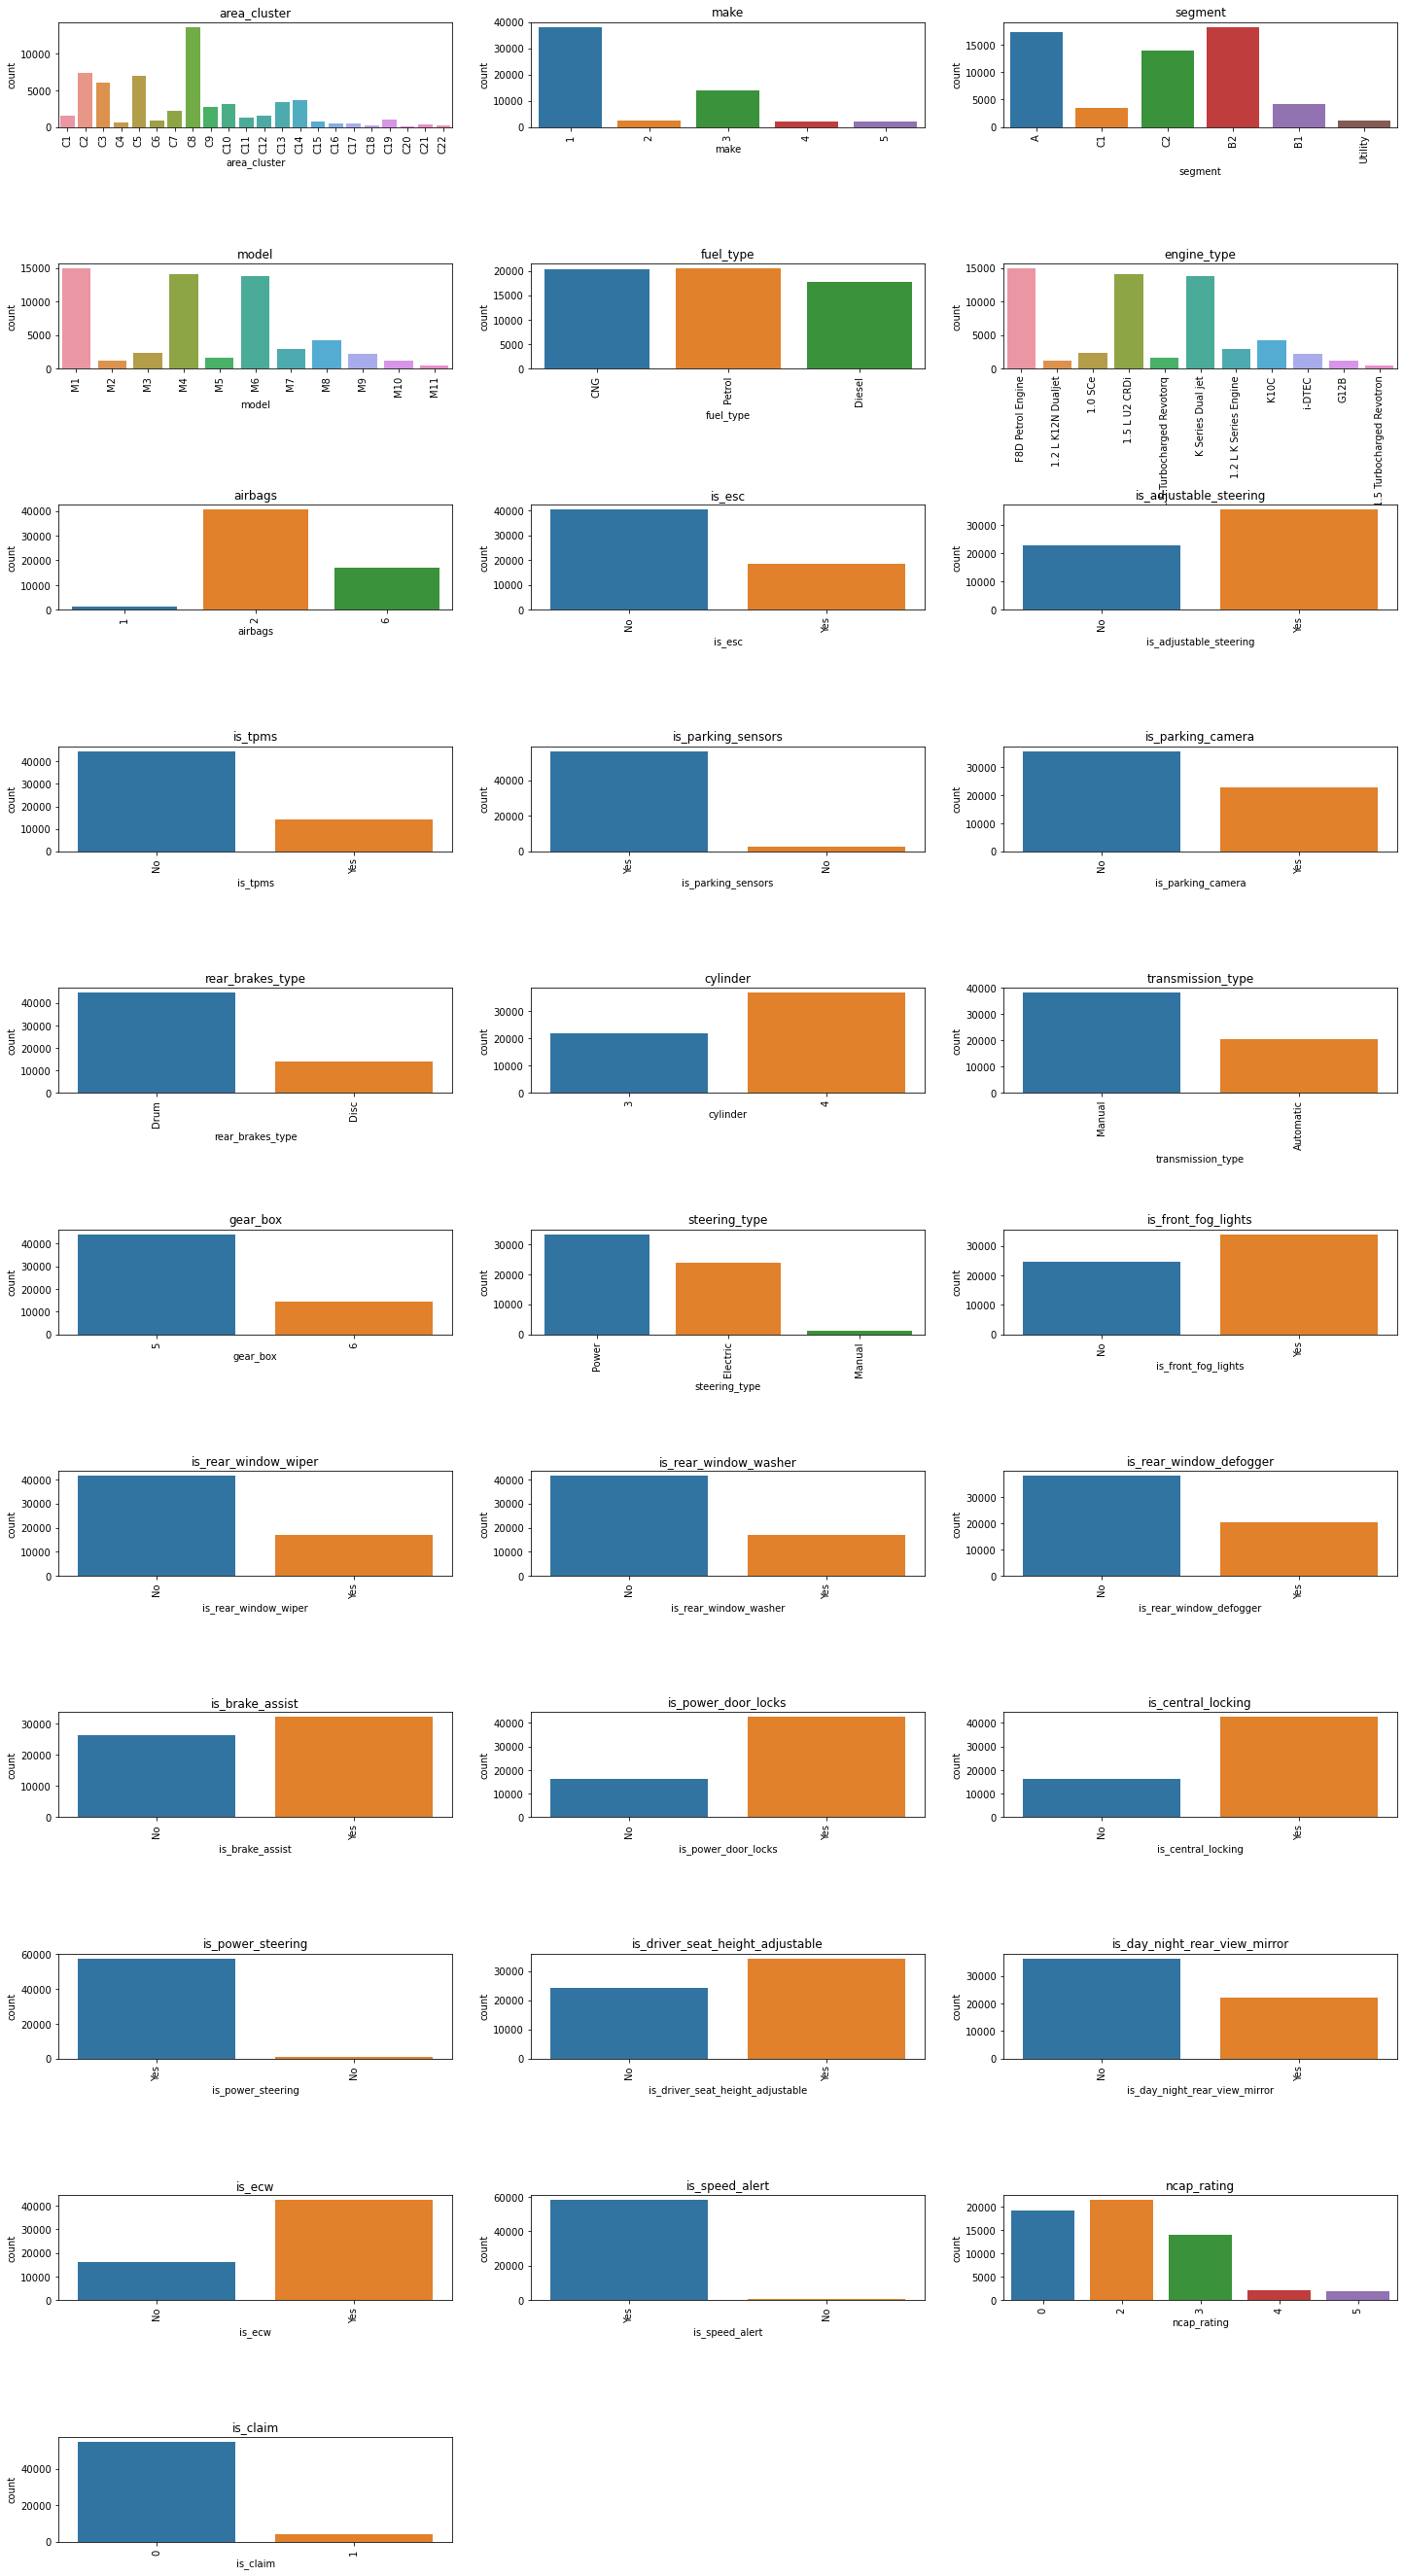

In [32]:
row =11
col=3
iterator=1
for i in  cat:
    plt.subplots_adjust(left=None, bottom=1, right=1.4, top=7, wspace=None, hspace=1.3)
    plt.subplot(row,col,iterator)
    sns.countplot(df.loc[:,i])
    plt.title(i)
    iterator+=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [33]:
# Numerical columns

In [34]:
num_col=df.select_dtypes(include=np.number).columns
num_col

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'displacement', 'turning_radius', 'length',
       'width', 'height', 'gross_weight', 'max_torque_Nm', 'max_torque_rpm',
       'max_power_bhp', 'max_power_rpm'],
      dtype='object')

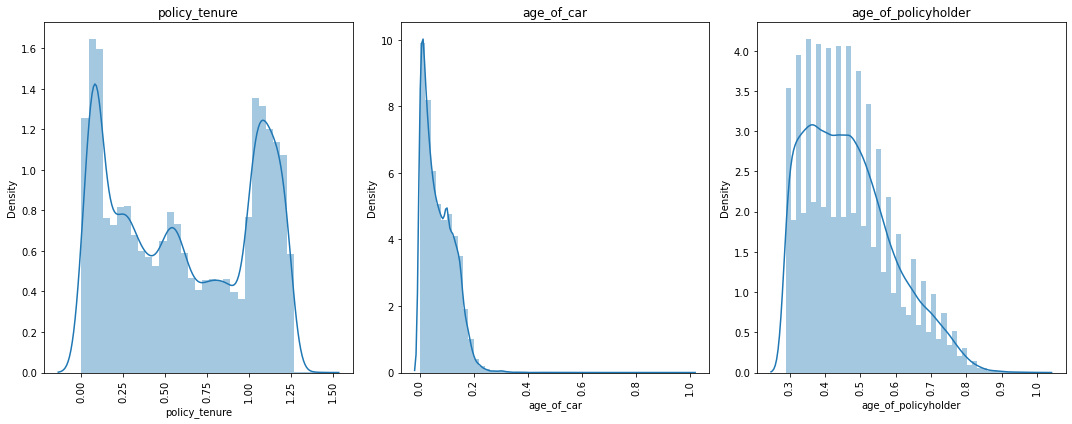

In [35]:
n=['policy_tenure', 'age_of_car', 'age_of_policyholder']
rows=1
columns=3
iterator=1

for i in n:
    plt.subplot(rows,columns,iterator)
    sns.distplot(df[i])
    plt.title(i)
    iterator=iterator+1
    plt.xticks(rotation=90)
    
plt.tight_layout()    
plt.show()

### Bivariate Analysis

In [36]:
cat

Index(['area_cluster', 'make', 'segment', 'model', 'fuel_type', 'engine_type',
       'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms',
       'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type',
       'cylinder', 'transmission_type', 'gear_box', 'steering_type',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

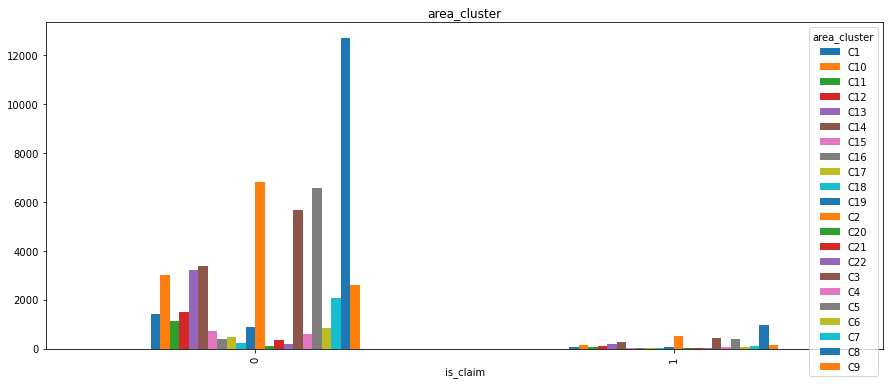

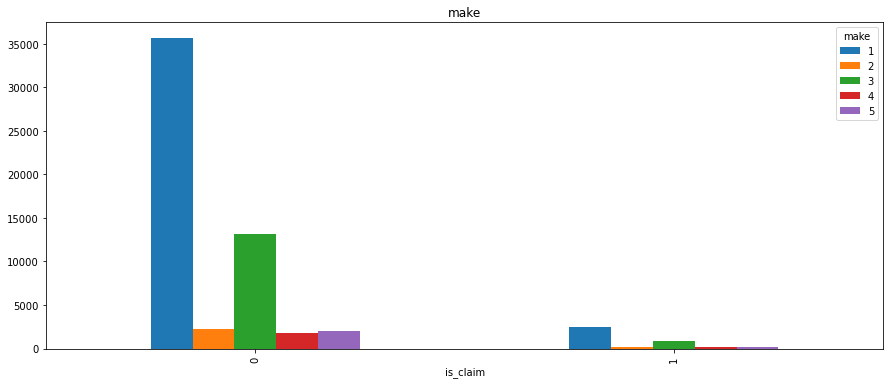

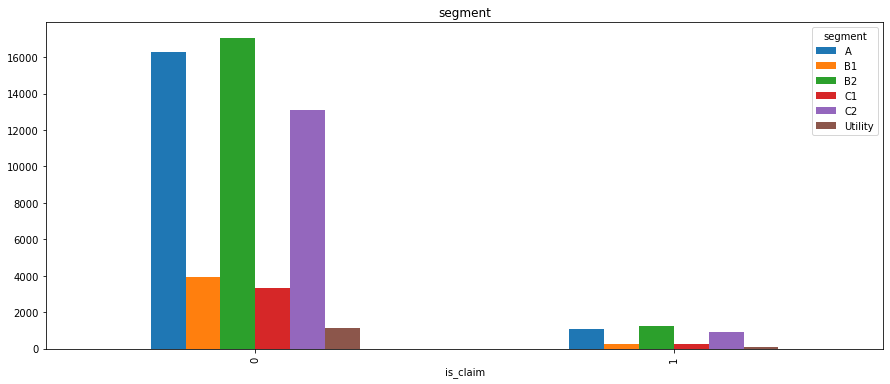

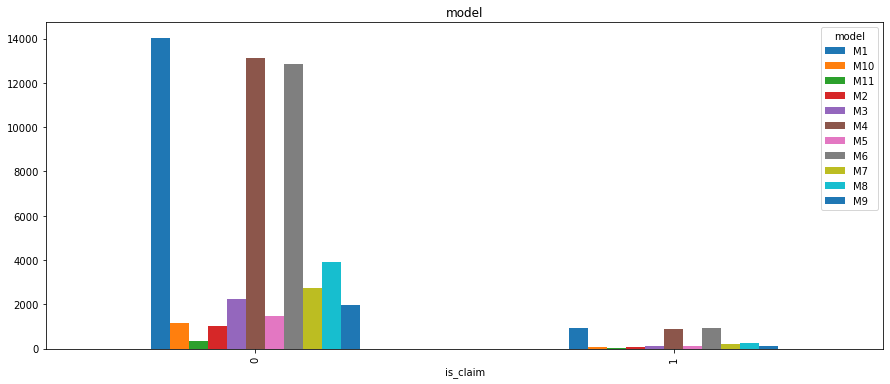

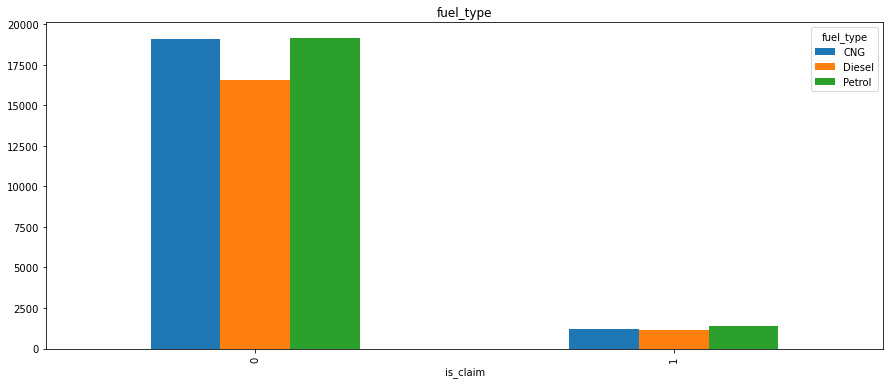

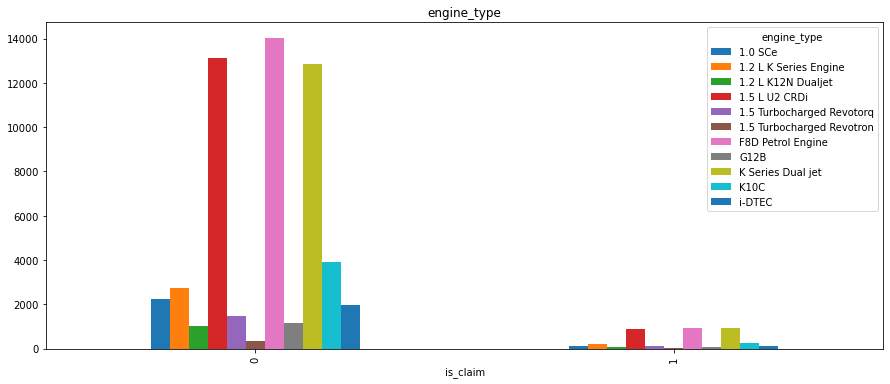

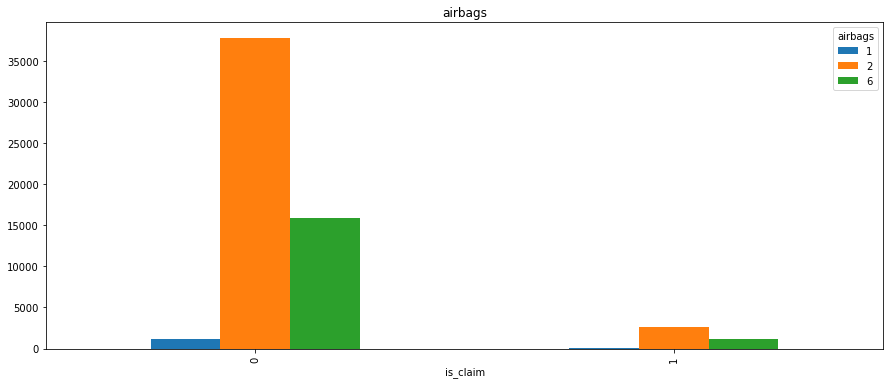

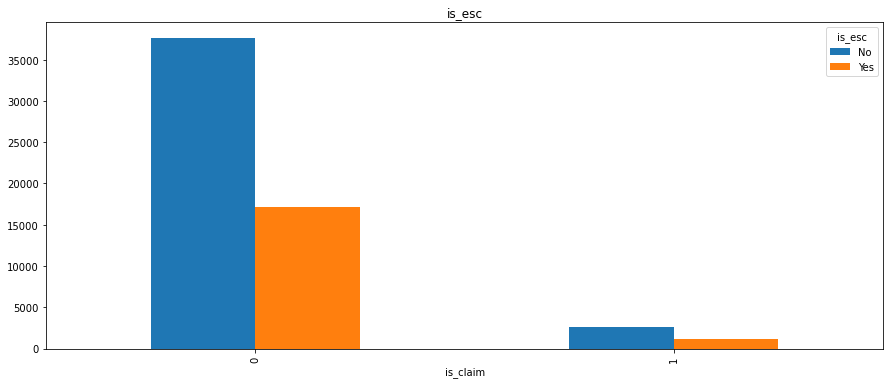

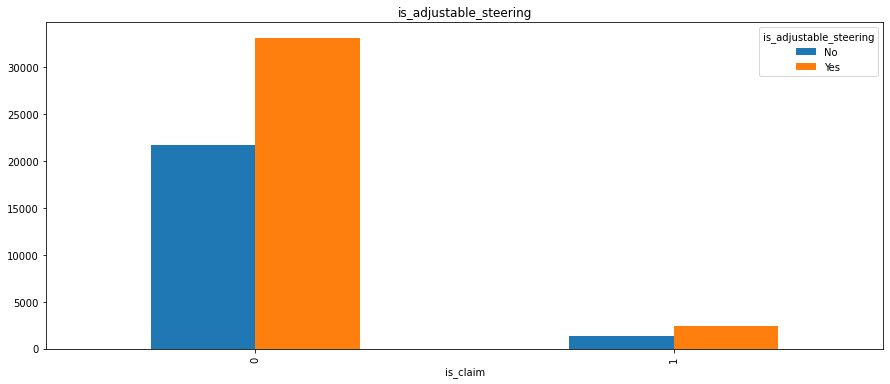

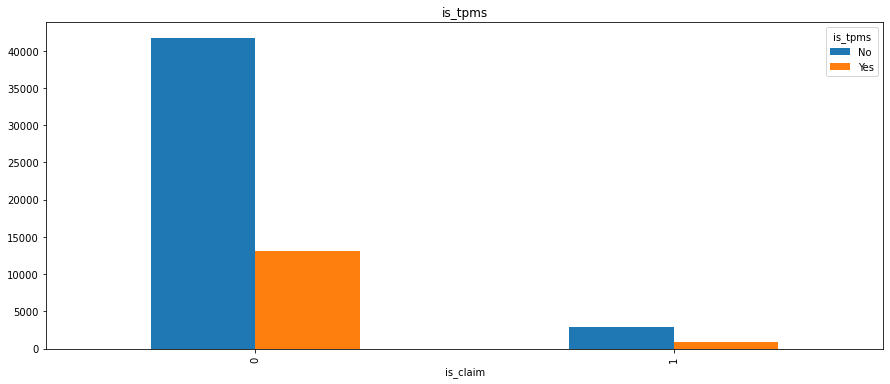

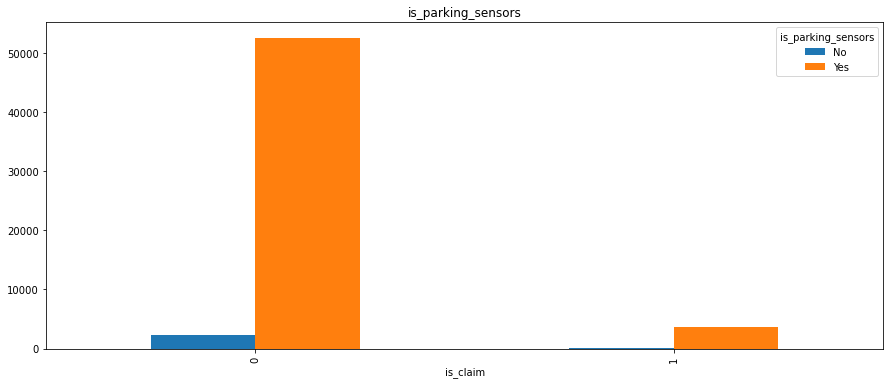

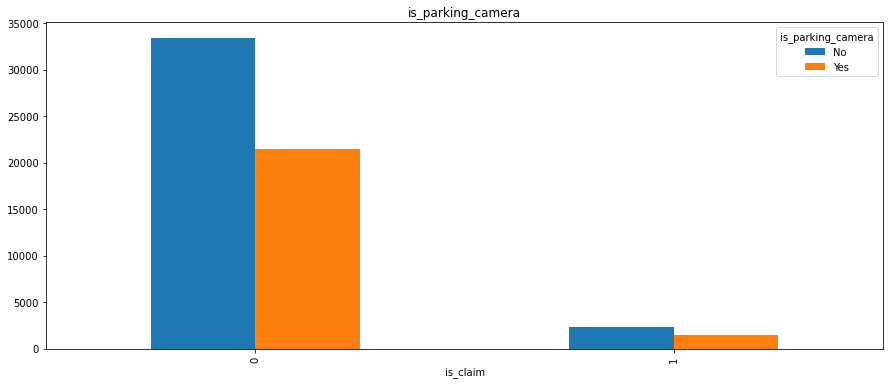

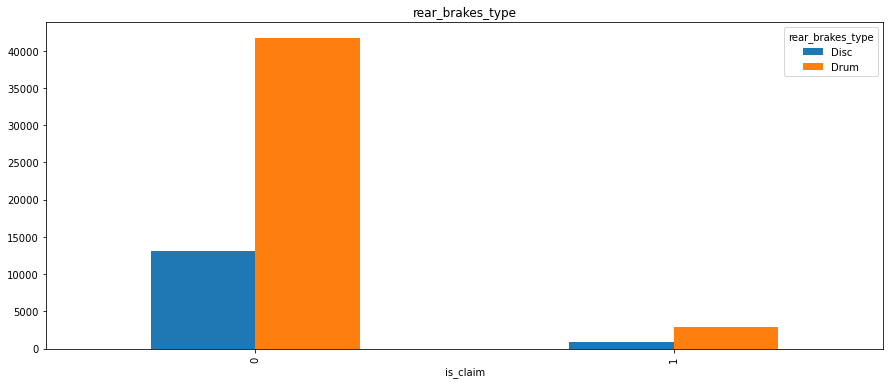

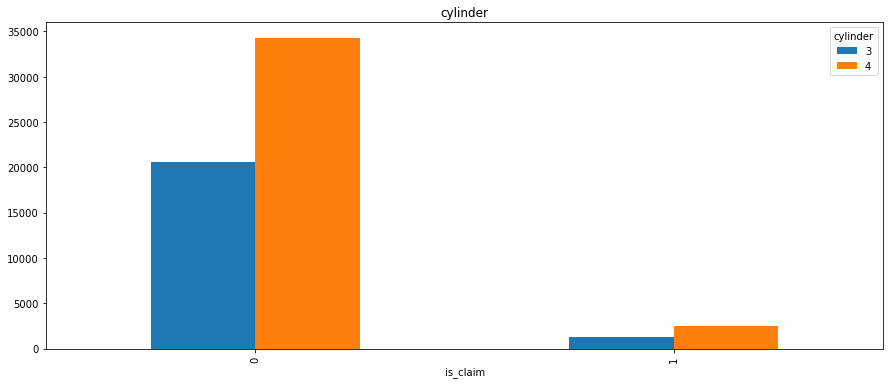

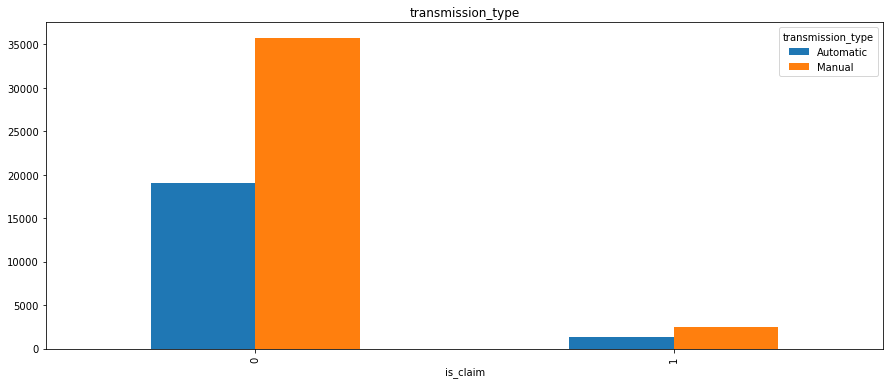

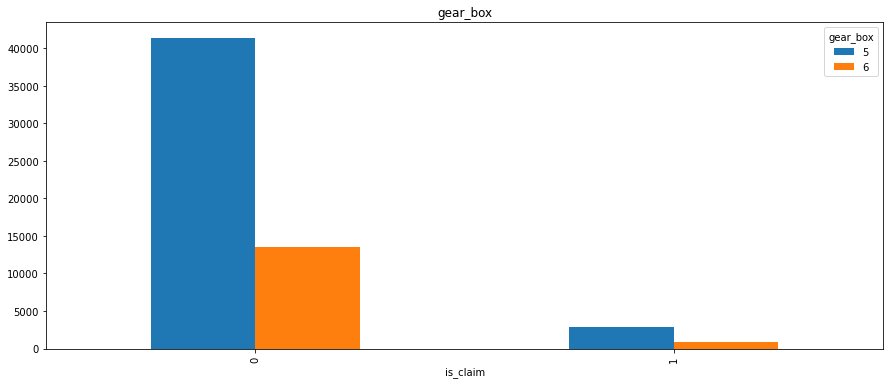

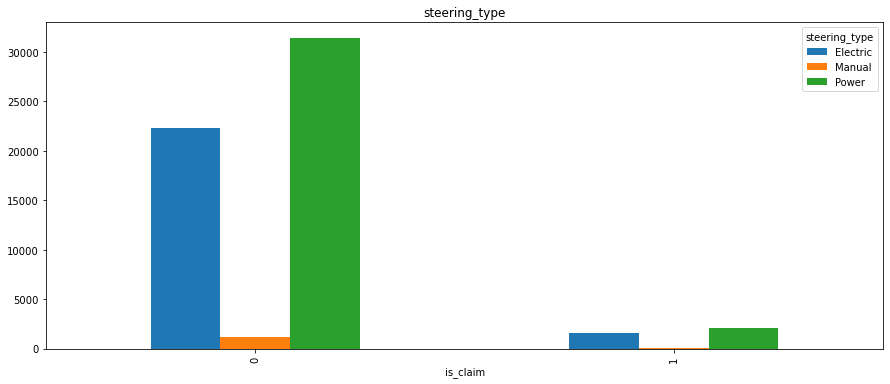

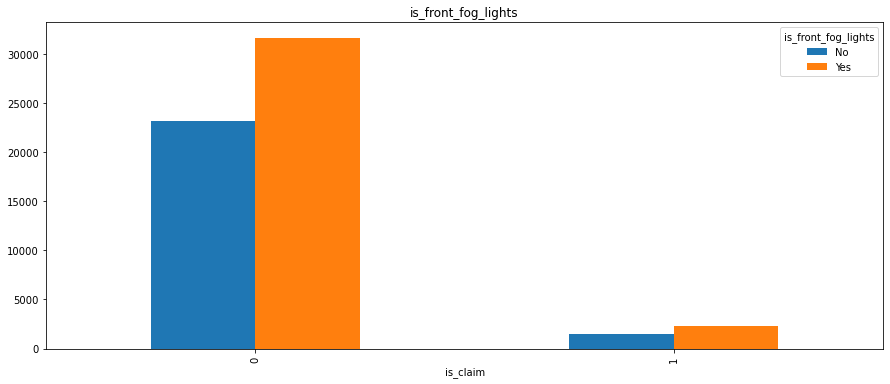

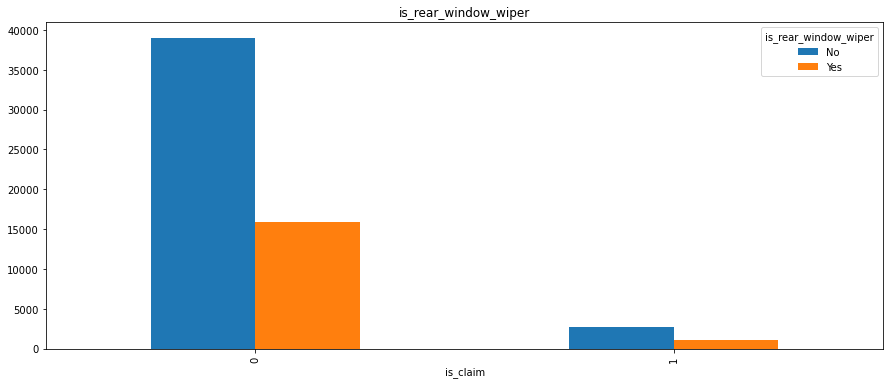

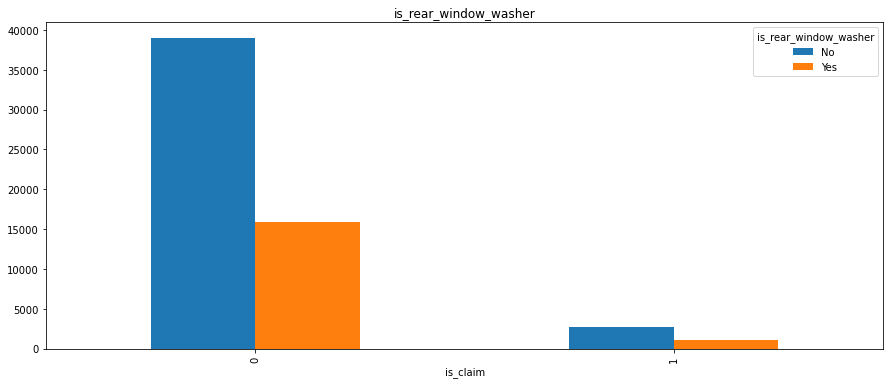

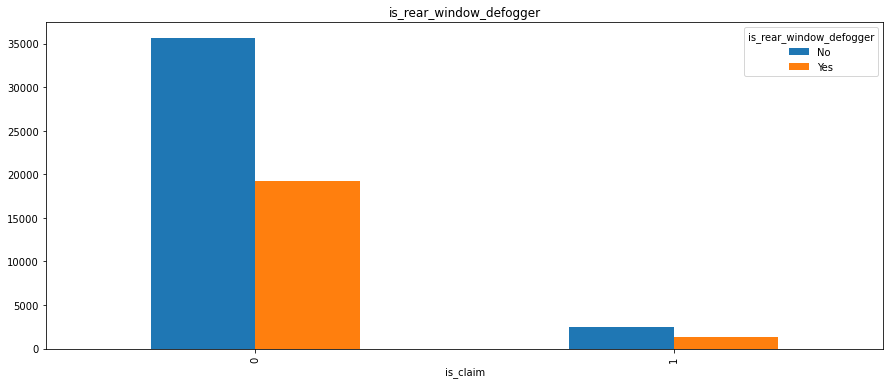

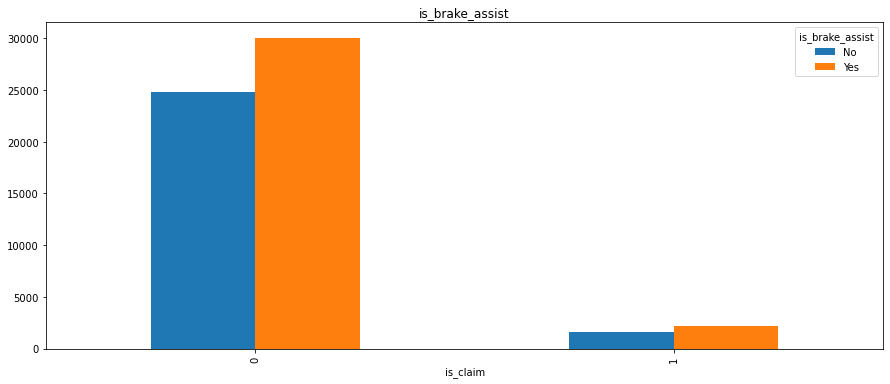

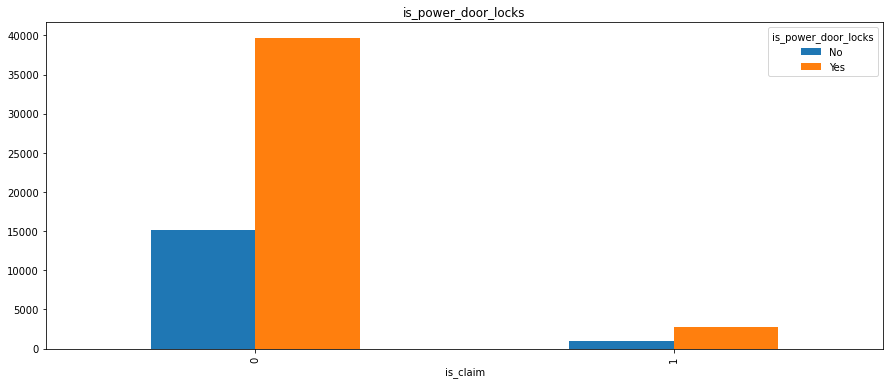

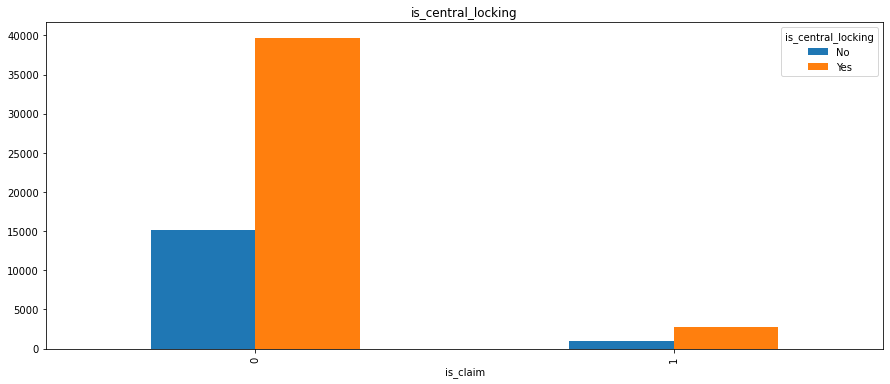

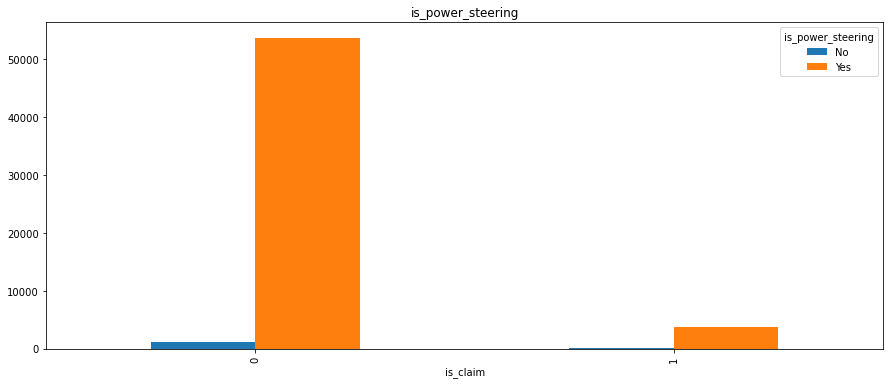

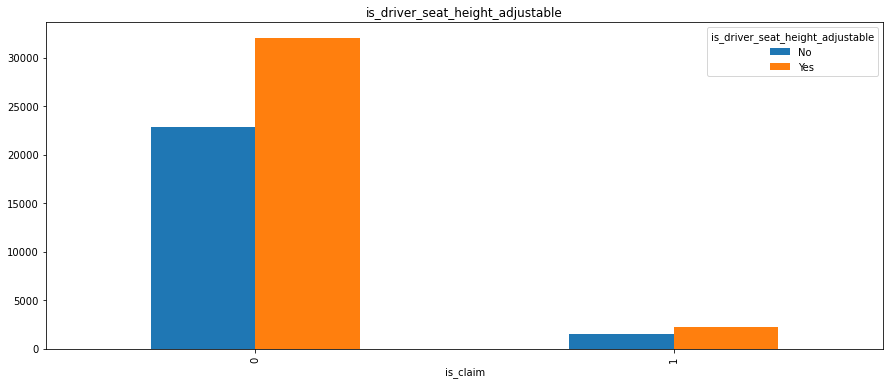

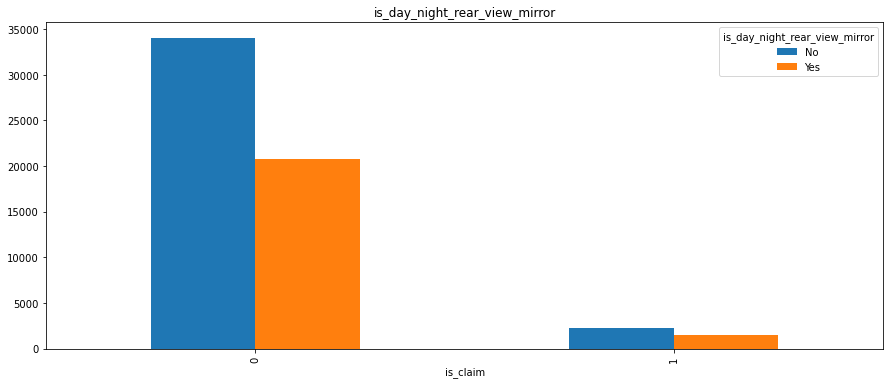

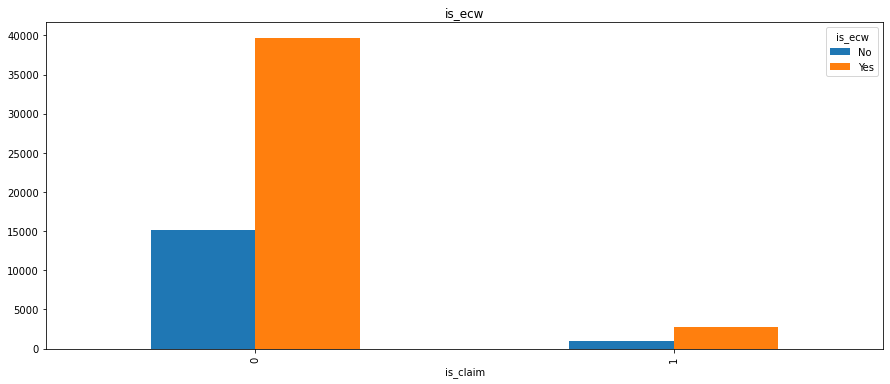

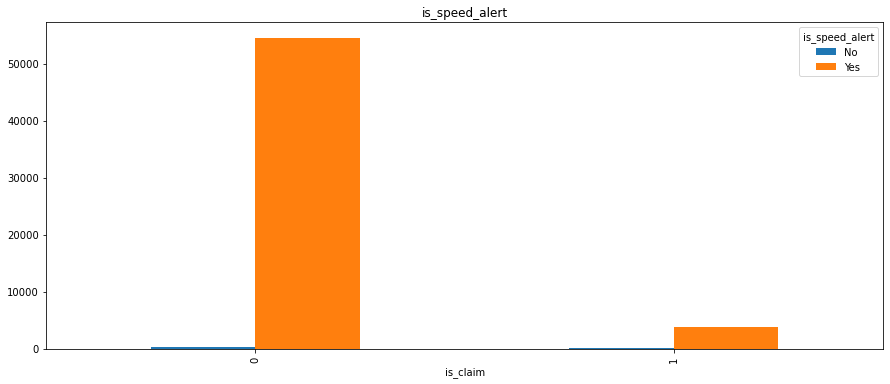

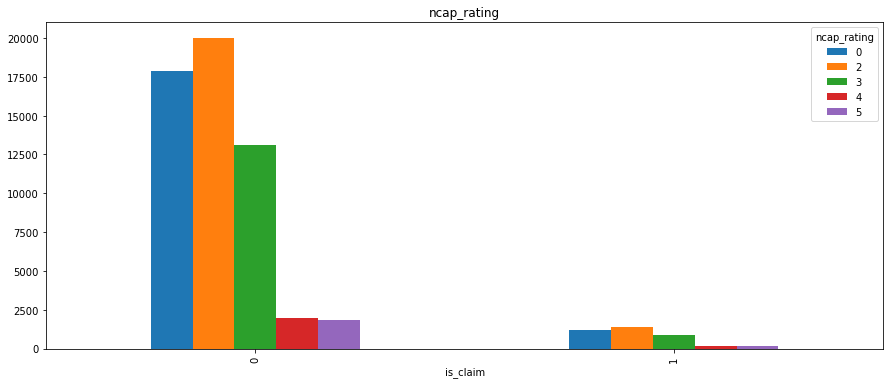

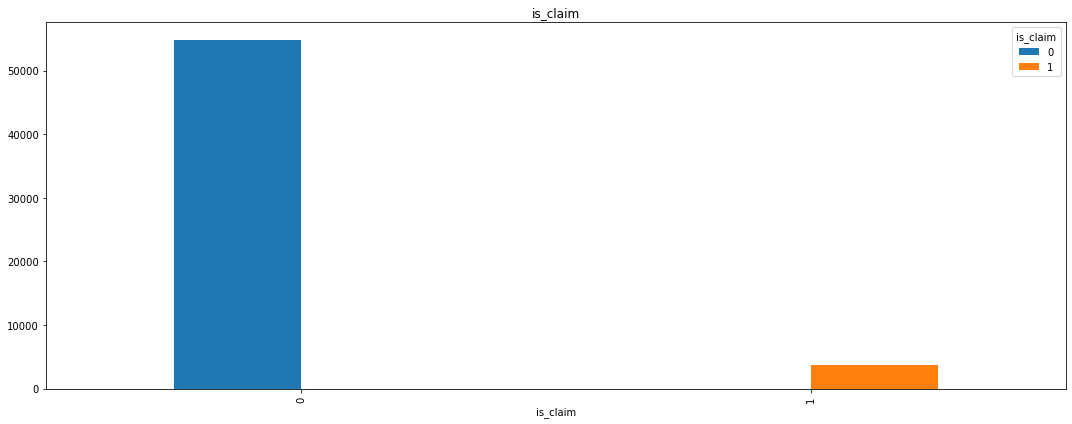

In [37]:
for i in  cat:
#   plt.subplot(row,col,iterator)
    pd.crosstab(df.is_claim,df[i]).plot(kind='bar')
    plt.title(i)
#   iterator+=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Multivariate Analysis

<AxesSubplot:>

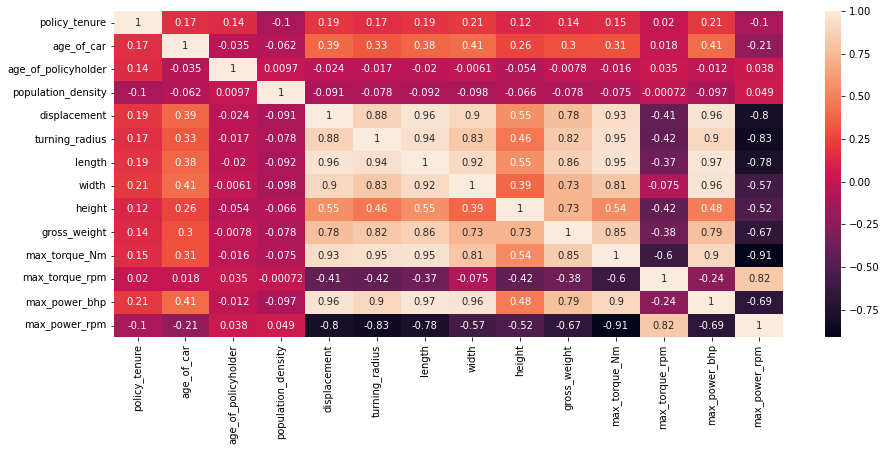

In [38]:
# plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True)

### Scaling and Encoding

In [39]:
# scaling Standard Scaler

In [40]:
num_col

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'displacement', 'turning_radius', 'length',
       'width', 'height', 'gross_weight', 'max_torque_Nm', 'max_torque_rpm',
       'max_power_bhp', 'max_power_rpm'],
      dtype='object')

In [41]:
scale=['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density','displacement', 'turning_radius',
       'length', 'width', 'height', 'gross_weight','max_torque_Nm', 'max_torque_rpm',
       'max_power_bhp', 'max_power_rpm']

In [42]:
ss=StandardScaler()

In [43]:
df.loc[:,scale]=ss.fit_transform(pd.DataFrame(df.loc[:,scale]))

In [44]:
# Frequency Encoding

In [45]:
cluster_freq=df['area_cluster'].value_counts(normalize=True).to_dict()
df['area_cluster']=df['area_cluster'].map(cluster_freq)

In [46]:
engine_freq=df['engine_type'].value_counts(normalize=True).to_dict()
df['engine_type']=df['engine_type'].map(engine_freq)

In [47]:
engine_freq=df['model'].value_counts(normalize=True).to_dict()
df['model']=df['model'].map(engine_freq)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  float64
 4   population_density                58592 non-null  float64
 5   make                              58592 non-null  object 
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  float64
 8   fuel_type                         58592 non-null  object 
 9   engine_type                       58592 non-null  float64
 10  airbags                           58592 non-null  object 
 11  is_esc                            58592 non-null  object 
 12  is_a

In [49]:
# OneHotEncoding

In [50]:
cat

Index(['area_cluster', 'make', 'segment', 'model', 'fuel_type', 'engine_type',
       'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms',
       'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type',
       'cylinder', 'transmission_type', 'gear_box', 'steering_type',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

In [51]:
one_hot_cat=['make', 'segment', 'fuel_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating']

In [52]:
# We are Creating new dataframe df1 here

In [53]:
df1=pd.get_dummies(data=df,columns=one_hot_cat,drop_first=True)

In [54]:
# To confirm that every column is numeric now df1.info()

In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 58 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   policy_tenure                         58592 non-null  float64
 1   age_of_car                            58592 non-null  float64
 2   age_of_policyholder                   58592 non-null  float64
 3   area_cluster                          58592 non-null  float64
 4   population_density                    58592 non-null  float64
 5   model                                 58592 non-null  float64
 6   engine_type                           58592 non-null  float64
 7   displacement                          58592 non-null  float64
 8   turning_radius                        58592 non-null  float64
 9   length                                58592 non-null  float64
 10  width                                 58592 non-null  float64
 11  height         

In [56]:
df1['is_claim']=df1['is_claim'].astype('int')

In [57]:
df1.shape

(58592, 58)

### Data Imbalance Treatment

In [58]:
# Divide data into x and y

In [59]:
x=df1.drop('is_claim',axis=1)
y=df1['is_claim']

In [60]:
y.value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

In [61]:
from imblearn.over_sampling import SMOTE

smt =  SMOTE(random_state=12,sampling_strategy=0.30)

x, y =  smt.fit_resample(x,y)

x.shape, y.shape

((71297, 57), (71297,))

In [62]:
y.shape

(71297,)

### Feature Selection

#### t-test Independent

In [63]:
num_col

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'displacement', 'turning_radius', 'length',
       'width', 'height', 'gross_weight', 'max_torque_Nm', 'max_torque_rpm',
       'max_power_bhp', 'max_power_rpm'],
      dtype='object')

In [64]:
# applying t-test independent and selecting columns where pval<0.05

In [65]:
numc=['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'displacement', 'turning_radius', 'length',
       'width', 'height', 'gross_weight', 'max_torque_Nm', 'max_torque_rpm',
       'max_power_bhp', 'max_power_rpm']
for col in numc:
    x1=df1.loc[(df1.is_claim==0),col]
    x2=df1.loc[(df1.is_claim==1),col]
    _,pval=scipy.stats.ttest_ind(x1,x2)
    if pval<0.05:
        print(col,pval)

policy_tenure 3.0181155800813767e-81
age_of_car 9.072910995001932e-12
age_of_policyholder 5.597168406298349e-08
population_density 1.6259324287866628e-05
width 0.016050284839034968


In [66]:
df1.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'model', 'engine_type', 'displacement',
       'turning_radius', 'length', 'width', 'height', 'gross_weight',
       'is_claim', 'max_torque_Nm', 'max_torque_rpm', 'max_power_bhp',
       'max_power_rpm', 'make_2', 'make_3', 'make_4', 'make_5', 'segment_B1',
       'segment_B2', 'segment_C1', 'segment_C2', 'segment_Utility',
       'fuel_type_Diesel', 'fuel_type_Petrol', 'airbags_2', 'airbags_6',
       'is_esc_Yes', 'is_adjustable_steering_Yes', 'is_tpms_Yes',
       'is_parking_sensors_Yes', 'is_parking_camera_Yes',
       'rear_brakes_type_Drum', 'cylinder_4', 'transmission_type_Manual',
       'gear_box_6', 'steering_type_Manual', 'steering_type_Power',
       'is_front_fog_lights_Yes', 'is_rear_window_wiper_Yes',
       'is_rear_window_washer_Yes', 'is_rear_window_defogger_Yes',
       'is_brake_assist_Yes', 'is_power_door_locks_Yes',
       'is_central_locking_Yes', 'is_power

#### Chi-square test

In [67]:
# To get columns for chi-square test (this will give target variable is_claim also.. just remove it)

In [68]:
set(df1.columns).difference(set(numc))

{'airbags_2',
 'airbags_6',
 'area_cluster',
 'cylinder_4',
 'engine_type',
 'fuel_type_Diesel',
 'fuel_type_Petrol',
 'gear_box_6',
 'is_adjustable_steering_Yes',
 'is_brake_assist_Yes',
 'is_central_locking_Yes',
 'is_claim',
 'is_day_night_rear_view_mirror_Yes',
 'is_driver_seat_height_adjustable_Yes',
 'is_ecw_Yes',
 'is_esc_Yes',
 'is_front_fog_lights_Yes',
 'is_parking_camera_Yes',
 'is_parking_sensors_Yes',
 'is_power_door_locks_Yes',
 'is_power_steering_Yes',
 'is_rear_window_defogger_Yes',
 'is_rear_window_washer_Yes',
 'is_rear_window_wiper_Yes',
 'is_speed_alert_Yes',
 'is_tpms_Yes',
 'make_2',
 'make_3',
 'make_4',
 'make_5',
 'model',
 'ncap_rating_2',
 'ncap_rating_3',
 'ncap_rating_4',
 'ncap_rating_5',
 'rear_brakes_type_Drum',
 'segment_B1',
 'segment_B2',
 'segment_C1',
 'segment_C2',
 'segment_Utility',
 'steering_type_Manual',
 'steering_type_Power',
 'transmission_type_Manual'}

In [69]:
test_cols=x.loc[:,['area_cluster','engine_type','model','make_2', 'make_3', 'make_4', 'make_5','segment_B1',
       'segment_B2', 'segment_C1', 'segment_C2', 'segment_Utility',
       'fuel_type_Diesel', 'fuel_type_Petrol', 'airbags_2', 'airbags_6',
       'is_esc_Yes', 'is_adjustable_steering_Yes', 'is_tpms_Yes',
       'is_parking_sensors_Yes', 'is_parking_camera_Yes',
       'rear_brakes_type_Drum', 'cylinder_4', 'transmission_type_Manual',
       'gear_box_6', 'steering_type_Manual', 'steering_type_Power',
       'is_front_fog_lights_Yes', 'is_rear_window_wiper_Yes',
       'is_rear_window_washer_Yes', 'is_rear_window_defogger_Yes',
       'is_brake_assist_Yes', 'is_power_door_locks_Yes',
       'is_central_locking_Yes', 'is_power_steering_Yes',
       'is_driver_seat_height_adjustable_Yes',
       'is_day_night_rear_view_mirror_Yes', 'is_ecw_Yes', 'is_speed_alert_Yes',
       'ncap_rating_2', 'ncap_rating_3', 'ncap_rating_4', 'ncap_rating_5']]

In [70]:
f_p_values=chi2(test_cols,y)
f_p_values

(array([5.22539105e+00, 2.30691361e-04, 2.30691361e-04, 1.09978540e+01,
        2.13968499e-01, 1.99217320e+00, 1.28546258e+00, 7.73089662e+00,
        2.24297925e+01, 3.33587722e+00, 2.13968499e-01, 1.19132836e+00,
        8.45357679e-01, 8.43415204e+00, 1.85214483e-02, 6.33086224e-03,
        2.48413171e-01, 1.62139060e+01, 2.13968499e-01, 4.53244891e-01,
        6.85302574e-02, 6.70903476e-02, 1.41746821e+01, 2.38325367e-02,
        9.48986508e-01, 1.19132836e+00, 1.15243712e+01, 1.18830753e+01,
        6.33086224e-03, 6.33086224e-03, 7.01830170e-01, 8.44462095e+00,
        3.07913918e+00, 3.07913918e+00, 2.48012174e-02, 9.59035138e+00,
        1.25892881e+01, 3.07913918e+00, 6.57751417e-02, 2.59769469e+00,
        2.13968499e-01, 1.28546258e+00, 1.99217320e+00]),
 array([2.22594408e-02, 9.87881775e-01, 9.87881775e-01, 9.12174433e-04,
        6.43674558e-01, 1.58113838e-01, 2.56885827e-01, 5.42837861e-03,
        2.17966639e-06, 6.77842525e-02, 6.43674558e-01, 2.75061775e-01,
      

In [71]:
p_chi=pd.Series(f_p_values[1])
p_chi.index=test_cols.columns
p_chi.sort_values(ascending=True)[p_chi.sort_values(ascending=True)<0.05].index

Index(['segment_B2', 'is_adjustable_steering_Yes', 'cylinder_4',
       'is_day_night_rear_view_mirror_Yes', 'is_front_fog_lights_Yes',
       'steering_type_Power', 'make_2', 'is_driver_seat_height_adjustable_Yes',
       'is_brake_assist_Yes', 'fuel_type_Petrol', 'segment_B1',
       'area_cluster'],
      dtype='object')

# Selected columns we are going to use

In [72]:
x_stat=x.loc[:,['segment_B2', 'is_adjustable_steering_Yes', 'cylinder_4',
       'is_day_night_rear_view_mirror_Yes', 'is_front_fog_lights_Yes',
       'steering_type_Power', 'make_2', 'is_driver_seat_height_adjustable_Yes',
       'is_brake_assist_Yes', 'fuel_type_Petrol', 'segment_B1',
       'area_cluster','policy_tenure', 'age_of_car','age_of_policyholder','population_density','width']]

### Train_Test_split

In [73]:
xtrain,xtest,ytrain,ytest=train_test_split(x_stat,y,test_size=0.2,random_state=2)

In [74]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(57037, 17)
(14260, 17)
(57037,)
(14260,)


#### Applying multiple models

In [79]:
clfs = {
    'KNN' : KNeighborsClassifier(),
    'Naive Bayes' : GaussianNB(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Ada Boost' : AdaBoostClassifier(),
    'Gradient Boost' : GradientBoostingClassifier(),
    'XgBoost' : XGBClassifier(),
}

models_report = pd.DataFrame(columns=['model name', 'accuracy', 'recall', 'precision', 'roc auc', 'f1 score'])

for clf, clf_name in list(zip(clfs.values(), clfs.keys())):
    clf.fit(xtrain, ytrain)
    y_pred = clf.predict(xtest)
    print('Fitting model...', clf_name)
    t = {'model name' : clf_name,
        'accuracy' : accuracy_score(ytest,y_pred),
        'recall' : recall_score(ytest,y_pred),
        'precision' : precision_score(ytest,y_pred),
        'roc auc' : roc_auc_score(ytest,y_pred),
        'f1 score' : f1_score(ytest,y_pred),
         'cohen_kappa_score' : cohen_kappa_score(ytest,y_pred)
        }
    models_report = models_report.append(t, ignore_index=True)

models_report = models_report.sort_values(by='f1 score', ascending=False)
models_report

Fitting model... KNN
Fitting model... Naive Bayes
Fitting model... Decision Tree
Fitting model... Random Forest
Fitting model... Ada Boost
Fitting model... Gradient Boost
Fitting model... XgBoost


,model name,accuracy,recall,precision,roc auc,f1 score,cohen_kappa_score
6,XgBoost,0.940042,0.735697,0.997891,0.867622,0.846966,0.810738
3,Random Forest,0.915428,0.688744,0.915289,0.835091,0.786018,0.734622
2,Decision Tree,0.861290,0.719527,0.682596,0.811049,0.700575,0.610395
0,KNN,0.828331,0.701182,0.602619,0.783269,0.648175,0.535498
5,Gradient Boost,0.864586,0.399565,1.000000,0.699782,0.570984,0.507574
4,Ada Boost,0.821599,0.225746,0.930769,0.610428,0.363363,0.301900
1,Naive Bayes,0.766760,0.061256,0.390873,0.516729,0.105914,0.047720


## DecisionTreeClassifier

In [276]:
tr=DecisionTreeClassifier()

In [277]:
tr.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [278]:
y_pred=tr.predict(xtest)

In [287]:
accuracy = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred)
recall = recall_score(ytest, y_pred)
f1score=f1_score(ytest,y_pred)
roc_auc=roc_auc_score(ytest,y_pred)
conf_matrix = confusion_matrix(ytest, y_pred)


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"f1_score: {f1score}")
print(f"roc_auc_score: {roc_auc}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.8634642356241234
Precision: 0.6881114734657575
Recall: 0.7217039800995025
f1_score: 0.7045075125208682
roc_auc_score: 0.813224318916104
Confusion Matrix:
[[9992 1052]
 [ 895 2321]]


In [116]:
#Test Report
class_report=classification_report(ytest,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.92      0.91      0.91     11044
           1       0.69      0.72      0.70      3216

    accuracy                           0.86     14260
   macro avg       0.80      0.81      0.81     14260
weighted avg       0.87      0.86      0.86     14260



In [288]:
# Training Report
tr_train_pred = tr.predict(xtrain)
print(classification_report(ytrain, tr_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43800
           1       1.00      1.00      1.00     13237

    accuracy                           1.00     57037
   macro avg       1.00      1.00      1.00     57037
weighted avg       1.00      1.00      1.00     57037



##### Hyperparameter Tuning using grid search cv

min_samples_split sets the minimum number of samples required to split a node. Increasing this value can make the tree less prone to overfitting because it prevents the creation of very small branches. However, setting it too high can lead to underfitting.

In [309]:
parameters={
     'criterion':['gini','entropy'],
     'max_depth':range(2,30),
    'min_samples_split': range(1,25)
     
}

In [310]:
cv=GridSearchCV(estimator=tr,param_grid=parameters,cv=20,verbose=1,scoring='f1')

In [311]:
cv.fit(xtrain,ytrain)

Fitting 20 folds for each of 1344 candidates, totalling 26880 fits


GridSearchCV(cv=20, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 30),
                         'min_samples_split': range(1, 25)},
             scoring='f1', verbose=1)

In [312]:
cv.best_params_

{'criterion': 'gini', 'max_depth': 29, 'min_samples_split': 3}

In [313]:
tr1=DecisionTreeClassifier(criterion= 'entropy',
                         max_depth=29,
                         min_samples_split=3,
                         random_state=20
                         )

In [314]:
tr1.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=29, min_samples_split=3,
                       random_state=20)

In [315]:
y_pred_hyp=tr1.predict(xtest)

In [316]:
# Test report
class_report=classification_report(ytest,y_pred_hyp)
print(class_report)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     11044
           1       0.75      0.66      0.70      3216

    accuracy                           0.87     14260
   macro avg       0.82      0.80      0.81     14260
weighted avg       0.87      0.87      0.87     14260



In [317]:
# Training Report
trhy_train_pred = tr1.predict(xtrain)
print(classification_report(ytrain, trhy_train_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     43800
           1       0.99      0.87      0.93     13237

    accuracy                           0.97     57037
   macro avg       0.98      0.93      0.95     57037
weighted avg       0.97      0.97      0.97     57037



##### random search cv for decision tree

In [322]:
parameters1={
     'criterion':['gini','entropy'],
     'max_depth':range(2,30),
     'min_samples_split': range(1,25),
    'min_samples_leaf': range(1,25)

}

In [325]:
drscv=RandomizedSearchCV(tr,param_distributions=parameters1,cv=15,scoring='f1',n_iter=100,verbose=1)

In [327]:
d=drscv.fit(xtrain,ytrain)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [328]:
drscv.best_params_

{'min_samples_split': 14,
 'min_samples_leaf': 4,
 'max_depth': 28,
 'criterion': 'entropy'}

In [331]:
d.best_params_

{'min_samples_split': 14,
 'min_samples_leaf': 4,
 'max_depth': 28,
 'criterion': 'entropy'}

In [332]:
tr2=DecisionTreeClassifier(criterion= 'entropy',
                         max_depth=28,
                         min_samples_split=14,
                         min_samples_leaf=4,
                         random_state=20
                         )

In [333]:
tr2.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_leaf=4,
                       min_samples_split=14, random_state=20)

In [334]:
y_pred_hyp_random=tr2.predict(xtest)

In [339]:
class_report=classification_report(ytest,y_pred_hyp_random)
print(class_report)

              precision    recall  f1-score   support

           0       0.90      0.95      0.92     11044
           1       0.78      0.62      0.69      3216

    accuracy                           0.88     14260
   macro avg       0.84      0.79      0.81     14260
weighted avg       0.87      0.88      0.87     14260



In [338]:
# Training Report
trhy_train_pred = tr2.predict(xtrain)
print(classification_report(ytrain, trhy_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     43800
           1       0.91      0.72      0.81     13237

    accuracy                           0.92     57037
   macro avg       0.92      0.85      0.88     57037
weighted avg       0.92      0.92      0.92     57037



## RandomForestClassifier

In [341]:
rf=RandomForestClassifier()

In [342]:
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [343]:
rfc_pred=rf.predict(xtest)

In [344]:
# Test report
class_report_rfc=classification_report(ytest,rfc_pred)
print(class_report_rfc)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11044
           1       0.92      0.69      0.79      3216

    accuracy                           0.92     14260
   macro avg       0.92      0.84      0.87     14260
weighted avg       0.92      0.92      0.91     14260



In [345]:
# Training Report
rfc_train_pred = rf.predict(xtrain)
print(classification_report(ytrain, rfc_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43800
           1       1.00      1.00      1.00     13237

    accuracy                           1.00     57037
   macro avg       1.00      1.00      1.00     57037
weighted avg       1.00      1.00      1.00     57037



In [346]:
prandom={
     'n_estimators':range(1,100),
     'criterion':['gini','entropy'],
     'max_depth': range(2,30)     
}

In [350]:
rscv=RandomizedSearchCV(rf,param_distributions=prandom,cv=20,scoring='f1',n_iter=70,verbose=1)

In [351]:
rscvmod=rscv.fit(xtrain,ytrain)
rscvmod

Fitting 20 folds for each of 70 candidates, totalling 1400 fits


RandomizedSearchCV(cv=20, estimator=RandomForestClassifier(), n_iter=70,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 30),
                                        'n_estimators': range(1, 100)},
                   scoring='f1', verbose=1)

In [353]:
rscvmod.best_params_

{'n_estimators': 74, 'max_depth': 28, 'criterion': 'gini'}

In [354]:
rscv1=RandomForestClassifier(criterion= 'gini',
                         max_depth=28,
                         n_estimators=74,
                         random_state=20
                         )

In [355]:
rscv_model=rscv1.fit(xtrain,ytrain)

In [356]:
rscv_pred=rscv_model.predict(xtest)

In [357]:
# test report
print(classification_report(ytest,rscv_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     11044
           1       0.92      0.67      0.78      3216

    accuracy                           0.91     14260
   macro avg       0.92      0.83      0.86     14260
weighted avg       0.91      0.91      0.91     14260



In [376]:
# training report
rscv_train_pred = rscv_model.predict(xtrain)
print(classification_report(ytrain, rscv_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43800
           1       1.00      0.98      0.99     13237

    accuracy                           1.00     57037
   macro avg       1.00      0.99      0.99     57037
weighted avg       1.00      1.00      1.00     57037



# XGBClassifier

In [359]:
xg=XGBClassifier()

In [360]:
x1=xg.fit(xtrain,ytrain)


In [361]:
xg_pred=x1.predict(xtest)

In [363]:
# Test report
print(classification_report(ytest,xg_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     11044
           1       1.00      0.74      0.85      3216

    accuracy                           0.94     14260
   macro avg       0.96      0.87      0.90     14260
weighted avg       0.94      0.94      0.94     14260



In [364]:
# Training Report
xg_train_pred = x1.predict(xtrain)
print(classification_report(ytrain, xg_train_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     43800
           1       1.00      0.75      0.86     13237

    accuracy                           0.94     57037
   macro avg       0.96      0.87      0.91     57037
weighted avg       0.95      0.94      0.94     57037



In [365]:
roc_auc_score(ytest,xg_pred)

0.8676218914482279

In [366]:
xg_param={
    'n_estimators':range(1,100),
    'learning_rate':[0.0001, 0.001, 0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7],
    'gamma':range(0,10)
}

In [367]:
xgcv=RandomizedSearchCV(estimator=xg,cv=20,param_distributions=xg_param,verbose=1,n_iter=50,scoring='roc_auc')

In [368]:
xgcv.fit(xtrain,ytrain)

Fitting 20 folds for each of 50 candidates, totalling 1000 fits


RandomizedSearchCV(cv=20,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.30...
                                           max_delta_step=0, max_depth=6,
                                           max_leaves=0, min_child_weight=1,
                                           missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=0,
                                           num_parallel_tree=1,
                                           predictor='auto', random_state=0, ...),
                   n_iter=50,
                   param_distributions={'gamma': range(0, 10),
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 0.2, 0.3, 0.4,
                                                          0.5, 0.6, 0.7],
                                        'n_estimators': range(1, 100)},
                   scoring='roc_auc', verbose=1)

In [369]:
xgcv.best_params_

{'n_estimators': 90, 'learning_rate': 0.3, 'gamma': 4}

In [370]:
xg11=XGBClassifier(n_estimators=90,learning_rate=0.3,gamma=4)

In [371]:
xg_=xg11.fit(xtrain,ytrain)

In [372]:
xg11_pred=xg_.predict(xtest)

In [373]:
print(classification_report(ytest,xg11_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     11044
           1       1.00      0.72      0.84      3216

    accuracy                           0.94     14260
   macro avg       0.96      0.86      0.90     14260
weighted avg       0.94      0.94      0.93     14260



In [374]:
# Training Report
xg11_train_pred = xg_.predict(xtrain)
print(classification_report(ytrain, xg11_train_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     43800
           1       1.00      0.73      0.85     13237

    accuracy                           0.94     57037
   macro avg       0.96      0.87      0.90     57037
weighted avg       0.94      0.94      0.93     57037



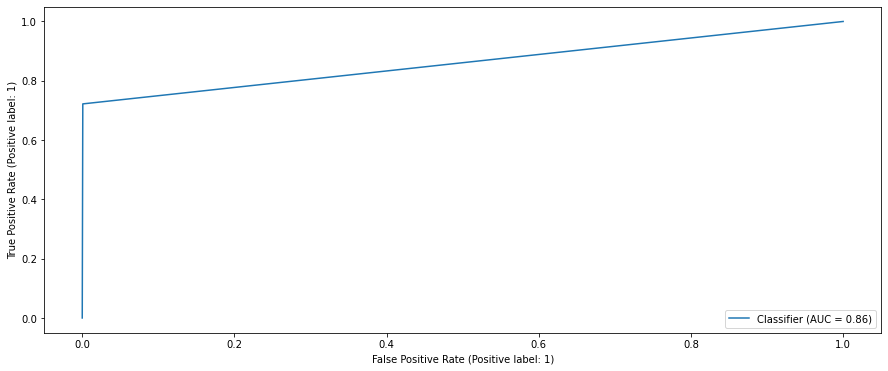

In [438]:
RocCurveDisplay.from_predictions(ytest,xg11_pred)